In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("./Speed+Dating+Data.csv", encoding = "ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
print('Showing the shape of the dataset')
print(df.shape)
print()

Showing the shape of the dataset
(8378, 195)



### Participants had to fill multiple surveys :

**1- When they registered: To put their infos.**

**2- When they registered: To rate the importance of different attributes (from their point of view), to rate the same attributes from the point of view of others men and women then to rate themselves on those same attributes.**

**3- After each dates: To rate the attributes of the person they met.**

**4- In the middle of the event: To rate again the importance of different attributes from their point of view then to rate themselves on those same attributes.**

**5- The next day: To rate the event itself then the second questionnary again (Participants had to fill the 5th survey in order to receive their matches).**

**6- 3 to 4 weeks after receiving their matches: To see if they contacted any of them then the second questionnary again.**

### The study was separated in 21 waves and used 2 differents rating style: 

**- The participants of waves 6 to 9 had rated on a scale from 1 à 10.**

**- The participants the other waves distributed 100 points amongst the attributes of each dates.**

#### I choose to separate the 2 differents rating styles and to split the dataset to have the 6 different surveys, in order to better see the evolution of opinions.


In [4]:
# Isolating the waves using the out of ten rating scale and dropping empty columns
out_of_ten = df[(df['wave'] >= 6) & (df['wave'] <= 9)]
out_of_ten = out_of_ten.dropna(axis='columns', how='all')

out_of_ten

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
1846,132,1.0,0,1,1,6,5,2,2.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1847,132,1.0,0,1,1,6,5,2,2.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1848,132,1.0,0,1,1,6,5,2,2.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1849,132,1.0,0,1,1,6,5,2,2.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850,132,1.0,0,1,1,6,5,2,2.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,233,20.0,1,40,2,9,20,20,11.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3404,233,20.0,1,40,2,9,20,1,11.0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3405,233,20.0,1,40,2,9,20,7,11.0,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3406,233,20.0,1,40,2,9,20,10,11.0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Isolating the waves using the 100 points distribution rating and dropping empty columns
hundred_distrib =  df[ (df['wave'] <= 5)]
df2 = df[(df['wave'] >= 10)]

# Concatenating the two dataframe and dropping the empty columns
hundred_distrib = pd.concat([ hundred_distrib, df2.loc[:]]).reset_index(drop=True)
hundred_distrib = hundred_distrib.dropna(axis='columns', how='all')

hundred_distrib

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
6812,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
6813,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
6814,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


## Looking at data around genders for the out of ten rating 

In [6]:
# Preparating the data for the first visualization for the out of ten rating scale
# Making the focus on the gender
out_ten_gender = out_of_ten.groupby(['gender']).agg('mean')
out_ten_gender

,iid,id,idg,condtn,wave,round,position,positin1,order,partner,...,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
gender,,,,,,,,,,,,,,,,,,,,,
0,180.373880,8.976953,16.921895,1.839949,8.120359,16.928297,8.964149,8.964149,8.964149,9.015365,...,9.172000,7.310000,6.906000,8.336000,6.528000,8.440000,8.464000,9.596000,8.810000,8.904000
1,197.302177,9.015365,17.934699,1.839949,8.120359,16.928297,8.964149,8.964149,8.964149,8.976953,...,7.638826,7.476298,7.286682,7.977427,7.981941,7.665914,8.600451,8.975169,7.571106,7.451467


In [7]:
# Renaming the raws for better reading
out_ten_gender = out_ten_gender.rename(index={0: "women", 1: "men"})
out_ten_gender

,iid,id,idg,condtn,wave,round,position,positin1,order,partner,...,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
gender,,,,,,,,,,,,,,,,,,,,,
women,180.373880,8.976953,16.921895,1.839949,8.120359,16.928297,8.964149,8.964149,8.964149,9.015365,...,9.172000,7.310000,6.906000,8.336000,6.528000,8.440000,8.464000,9.596000,8.810000,8.904000
men,197.302177,9.015365,17.934699,1.839949,8.120359,16.928297,8.964149,8.964149,8.964149,8.976953,...,7.638826,7.476298,7.286682,7.977427,7.981941,7.665914,8.600451,8.975169,7.571106,7.451467


In [8]:
#Creating a plot which will show the mean of each attributes looked for in a partenaire at differents stages of the process
#This plot is based on the out of 10 rating system
fig = make_subplots(rows = 2, cols = 2, subplot_titles = ("During inscription", "In the middle of the event", "The day after the event", "3-4 weeks after reveiving their matches"))

#Creating the plot of the mean rate during inscription for the two gender available
fig.add_trace(
    go.Bar(
        x = out_ten_gender.filter(like='1_1').columns,
        y = out_ten_gender.loc['women',: ].filter(like="1_1"),
        name = 'Women',
        marker_color = 'crimson'), 
        row = 1,
        col = 1)

fig.add_trace(
    go.Bar(
        x = out_ten_gender.filter(like='1_1').columns,
        y = out_ten_gender.loc['men',: ].filter(like="1_1"),
        marker_color = 'dodgerblue',
        name = 'Men'), 
        row = 1,
        col = 1)

#Creating the plot of the mean rate in the middle of the event for the two gender available
fig.add_trace(
     go.Bar(
        x = out_ten_gender.filter(like='1_s').columns,
        y = out_ten_gender.loc['women',: ].filter(like="1_s"),
        name = 'Women',
        marker_color = 'crimson',
        showlegend = False),
        row = 1,
        col = 2)

fig.add_trace(
     go.Bar(
        x = out_ten_gender.filter(like='1_s').columns,
        y = out_ten_gender.loc['men',: ].filter(like="1_s"),
        marker_color = 'dodgerblue',
        name = 'Men',
        showlegend = False),
        row = 1,
        col = 2)

#Creating the plot of the mean rate a day after the event for the two gender available
fig.add_trace(
     go.Bar(
        x = out_ten_gender.filter(like='1_2').columns,
        y = out_ten_gender.loc['women',: ].filter(like="1_2"),
        name = 'Women',
        marker_color = 'crimson',
        showlegend = False),
        row = 2,
        col = 1)

fig.add_trace(
     go.Bar(
        x = out_ten_gender.filter(like='1_2').columns,
        y = out_ten_gender.loc['men',: ].filter(like="1_2"),
        marker_color = 'dodgerblue',
        name = 'Men',
        showlegend = False),
        row = 2,
        col = 1)

#Creating the plot of the mean rate 3-4 weeks after receiving their matches for the two gender available
fig.add_trace(
     go.Bar(
        x = out_ten_gender.filter(like='1_3').columns,
        y = out_ten_gender.loc['women',: ].filter(like="1_3"),
        name = 'Women',
        marker_color = 'crimson',
        showlegend = False),
        row = 2,
        col = 2)

fig.add_trace(
     go.Bar(
        x = out_ten_gender.filter(like='1_3').columns,
        y = out_ten_gender.loc['men',: ].filter(like="1_3"),
        marker_color = 'dodgerblue',
        name = 'Men',
        showlegend = False),
        row = 2,
        col = 2)

fig.update_layout(
        title = go.layout.Title(text = "Mean of attributes of that candidates looked for in a partenaire for the out of ten rating"), barmode='group')


**Something is wrong here: those waves should have mean between 1 and 10 since it's supposed to be an out of ten rating scale.**

**I'm going to explore more and see how much data is out of bounds.**

In [9]:
# Showing how many values are over 10 in each columns

overten = 0
for i in out_of_ten['attr1_1']:
    if (i > 10) == True:
        
        overten = overten + 1

print("There is {}/{} values over 10 for the attr1_1 column".format(overten, out_of_ten['attr1_1'].shape[0]))

overten = 0
for i in out_of_ten['sinc1_1']:
    if (i > 10) == True:
        
        overten = overten + 1

print("There is {}/{} values over 10 for the sinc1_1 column".format(overten, out_of_ten['sinc1_1'].shape[0]))

overten = 0
for i in out_of_ten['intel1_1']:
    if (i > 10) == True:
        overten = overten + 1

print("There is {}/{} values over 10 for the intel1_1 column".format(overten, out_of_ten['intel1_1'].shape[0]))

overten = 0
for i in out_of_ten['fun1_1']:
    if (i > 10) == True:
        
        overten = overten + 1

print("There is {}/{} values over 10 for the fun1_1 column".format(overten, out_of_ten['fun1_1'].shape[0]))

overten = 0
for i in out_of_ten['amb1_1']:
    if (i > 10) == True:
        
        overten = overten + 1

print("There is {}/{} values over 10 for the amb1_1 column".format(overten, out_of_ten['amb1_1'].shape[0]))

overten = 0
for i in out_of_ten['shar1_1']:
    if (i > 10) == True:
        
        overten = overten + 1

print("There is {}/{} values over 10 for the shar1_1 column".format(overten, out_of_ten['shar1_1'].shape[0]))

There is 1454/1562 values over 10 for the attr1_1 column
There is 1537/1562 values over 10 for the sinc1_1 column
There is 1557/1562 values over 10 for the intel1_1 column
There is 1557/1562 values over 10 for the fun1_1 column
There is 1389/1562 values over 10 for the amb1_1 column
There is 1381/1562 values over 10 for the shar1_1 column


**The large majority of the data is over 10 so it's certainly not the expected /10 rating system.** 

**I want to plot the outliers.**

In [10]:
# Looking for ouliers in the columns
fig = go.Figure()


fig.add_trace(
    go.Box(
        x = out_of_ten[ "attr1_1" ]))

fig.add_trace(
    go.Box(
        x = out_of_ten[ "sinc1_1" ],
        visible = False))

fig.add_trace(
     go.Box(
        x = out_of_ten[ "intel1_1" ],
        visible = False))

fig.add_trace(
     go.Box(
        x = out_of_ten[ "fun1_1" ],
        visible = False))

fig.add_trace(
     go.Box(
        x = out_of_ten[ "amb1_1" ],
        visible = False))

fig.add_trace(
     go.Box(
        x = out_of_ten[ "shar1_1" ],
        visible = False))

fig.update_layout(
        title = go.layout.Title(text = "Looking for outliers in the attributes rated during the inscription process", x = 0.5),
        showlegend = False)

fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Attractivness (att1_1)",
                        method = "update",
                        args = [{"visible" : [True, False, False, False, False, False]}]),

                    go.layout.updatemenu.Button(
                            label = "Sincerity (sinc1_1)",
                            method = "update",
                            args = [{"visible" : [False, True, False, False, False, False]}]),

                    go.layout.updatemenu.Button(
                            label = "Intelligence (intel1_1)",
                            method = "update",
                            args = [{"visible" : [False, False, True, False, False, False]}]),
                    
                    go.layout.updatemenu.Button(
                            label = "Fun (fun1_1)",
                            method = "update",
                            args = [{"visible" : [False, False, False, True, False, False]}]),

                    go.layout.updatemenu.Button(
                            label = "Ambition (amb1_1)",
                            method = "update",
                            args = [{"visible" : [False, False, False, False, True, False]}]),

                    go.layout.updatemenu.Button(
                            label = "Shared interest/hobbies (shar1_1)",
                            method = "update",
                            args = [{"visible" : [False, False, False, False, False, True]}])
                    
                ]
    )]
)

**A huge part of the data doesn't feat the descrition that was given. I'm taking the decision to ignore those waves, I don't know what rating is used so I can't use them without making assumptions which could affect my results. I thought about going with an /20 rating system but the fact that their is rarely values under 10 and values over 20 made me doubt of the accuracy of this assumption.**
**We can see that the data is so far from expected that values under 10 are considered ouliers.** 

**I'm going to do the same process to the 100pt distribution.**

## Looking at data around genders for the 100pt distribution 

In [11]:
# Preparating the data for the first visualization for the 100pt distribution rating
# Making the focus on the mean per gender
mean_hun_gender = hundred_distrib.groupby(['gender']).agg('mean')
mean_hun_gender

,iid,id,idg,condtn,wave,round,position,positin1,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
gender,,,,,,,,,,,,,,,,,,,,,
0,297.245959,9.034969,16.967088,1.827505,12.101675,16.748457,9.068175,9.356539,8.874229,8.883044,...,7.116883,8.283943,7.991736,7.613341,7.078512,6.950628,8.007181,7.840215,7.256732,6.963196
1,313.549370,8.869285,17.639906,1.825081,12.080867,16.969528,9.053326,9.443461,8.964254,9.029007,...,6.807031,7.545251,8.246073,7.314884,7.202693,6.636364,7.130820,8.046563,7.029933,7.154102


In [12]:
# Renaming the raws for better reading
mean_hun_gender = mean_hun_gender.rename(index={0: "women", 1: "men"})
mean_hun_gender

,iid,id,idg,condtn,wave,round,position,positin1,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
gender,,,,,,,,,,,,,,,,,,,,,
women,297.245959,9.034969,16.967088,1.827505,12.101675,16.748457,9.068175,9.356539,8.874229,8.883044,...,7.116883,8.283943,7.991736,7.613341,7.078512,6.950628,8.007181,7.840215,7.256732,6.963196
men,313.549370,8.869285,17.639906,1.825081,12.080867,16.969528,9.053326,9.443461,8.964254,9.029007,...,6.807031,7.545251,8.246073,7.314884,7.202693,6.636364,7.130820,8.046563,7.029933,7.154102


In [13]:
# Creating a second dataframe focusing on the median per gender
median_hun = hundred_distrib.groupby(['gender']).agg('median')
median_hun

,iid,id,idg,condtn,wave,round,position,positin1,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
gender,,,,,,,,,,,,,,,,,,,,,
0,329.0,8.0,15.0,2.0,13.0,18.0,8.0,9.0,8.0,8.0,...,7.0,9.0,8.0,8.0,7.0,7.0,8.0,8.0,7.0,7.0
1,338.0,8.0,16.0,2.0,13.0,18.0,8.0,9.0,8.0,8.0,...,7.0,8.0,8.0,8.0,7.0,7.0,7.0,8.0,7.0,7.0


In [14]:
median_hun = median_hun.rename(index={0: "women", 1: "men"})
median_hun

,iid,id,idg,condtn,wave,round,position,positin1,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
gender,,,,,,,,,,,,,,,,,,,,,
women,329.0,8.0,15.0,2.0,13.0,18.0,8.0,9.0,8.0,8.0,...,7.0,9.0,8.0,8.0,7.0,7.0,8.0,8.0,7.0,7.0
men,338.0,8.0,16.0,2.0,13.0,18.0,8.0,9.0,8.0,8.0,...,7.0,8.0,8.0,8.0,7.0,7.0,7.0,8.0,7.0,7.0


In [15]:
#Creating a plot which will show the mean of each attributes looked for in a partenaire at differents stages of the process
#This plot is based on the 100 points distribution rating system
fig = make_subplots(rows = 2, cols = 2, subplot_titles = ("During inscription", "In the middle of the event", "The day after the event", "3-4 weeks after reveiving their matches"))

#Creating the plot of the mean rate during inscription for the two gender available
fig.add_trace(
    go.Bar(
        x = mean_hun_gender.filter(like='1_1').columns,
        y = mean_hun_gender.loc['women',: ].filter(like="1_1"),
        name = 'Women',
        marker_color = 'crimson'), 
        row = 1,
        col = 1)

fig.add_trace(
    go.Bar(
        x = mean_hun_gender.filter(like='1_1').columns,
        y = mean_hun_gender.loc['men',: ].filter(like="1_1"),
        marker_color = 'dodgerblue',
        name = 'Men'), 
        row = 1,
        col = 1)

#Creating the plot of the mean rate in the middle of the event for the two gender available
fig.add_trace(
     go.Bar(
        x = mean_hun_gender.filter(like='1_s').columns,
        y = mean_hun_gender.loc['women',: ].filter(like="1_s"),
        name = 'Women',
        marker_color = 'crimson',
        showlegend = False),
        row = 1,
        col = 2)

fig.add_trace(
     go.Bar(
        x = mean_hun_gender.filter(like='1_s').columns,
        marker_color = 'dodgerblue',
        y = mean_hun_gender.loc['men',: ].filter(like="1_s"),
        name = 'Men',
        showlegend = False),
        row = 1,
        col = 2)

#Creating the plot of the mean rate a day after the event for the two gender available
fig.add_trace(
     go.Bar(
        x = mean_hun_gender.filter(like='1_2').columns,
        y = mean_hun_gender.loc['women',: ].filter(like="1_2"),
        name = 'Women',
        marker_color = 'crimson',
        showlegend = False),
        row = 2,
        col = 1)

fig.add_trace(
     go.Bar(
        x = mean_hun_gender.filter(like='1_2').columns,
        y = mean_hun_gender.loc['men',: ].filter(like="1_2"),
        marker_color = 'dodgerblue',
        name = 'Men',
        showlegend = False),
        row = 2,
        col = 1)

#Creating the plot of the mean rate 3-4 weeks after receiving their matches for the two gender available
fig.add_trace(
     go.Bar(
        x = mean_hun_gender.filter(like='1_3').columns,
        y = mean_hun_gender.loc['women',: ].filter(like="1_3"),
        name = 'Women',
        marker_color = 'crimson',
        showlegend = False),
        row = 2,
        col = 2)

fig.add_trace(
     go.Bar(
        x = mean_hun_gender.filter(like='1_3').columns,
        y = mean_hun_gender.loc['men',: ].filter(like="1_3"),
        marker_color = 'dodgerblue',
        name = 'Men',
        showlegend = False),
        row = 2,
        col = 2)

fig.update_layout(
        title = go.layout.Title(text = "Mean of attributes of that candidates looked for in a partenaire for the 100 points rating"), barmode='group')


In [16]:
# Same graph but with the median instead of the mean
# This plot is based on the 100 points distribution rating system
fig = make_subplots(rows = 2, cols = 2, subplot_titles = ("During inscription", "In the middle of the event", "The day after the event", "3-4 weeks after reveiving their matches"))

#Creating the plot of the median rate during inscription for the two gender available
fig.add_trace(
    go.Bar(
        x = median_hun.filter(like='1_1').columns,
        y = median_hun.loc['women',: ].filter(like="1_1"),
        name = 'Women',
        marker_color = 'crimson'), 
        row = 1,
        col = 1)

fig.add_trace(
    go.Bar(
        x = median_hun.filter(like='1_1').columns,
        y = median_hun.loc['men',: ].filter(like="1_1"),
        marker_color = 'dodgerblue',
        name = 'Men'), 
        row = 1,
        col = 1)

#Creating the plot of the median rate in the middle of the event for the two gender available
fig.add_trace(
     go.Bar(
        x = median_hun.filter(like='1_s').columns,
        y = median_hun.loc['women',: ].filter(like="1_s"),
        name = 'Women',
        marker_color = 'crimson',
        showlegend = False),
        row = 1,
        col = 2)

fig.add_trace(
     go.Bar(
        x = median_hun.filter(like='1_s').columns,
        y = median_hun.loc['men',: ].filter(like="1_s"),
        marker_color = 'dodgerblue',
        name = 'Men',
        showlegend = False),
        row = 1,
        col = 2)

#Creating the plot of the median rate a day after the event for the two gender available
fig.add_trace(
     go.Bar(
        x = median_hun.filter(like='1_2').columns,
        y = median_hun.loc['women',: ].filter(like="1_2"),
        name = 'Women',
        marker_color = 'crimson',
        showlegend = False),
        row = 2,
        col = 1)

fig.add_trace(
     go.Bar(
        x = median_hun.filter(like='1_2').columns,
        y = median_hun.loc['men',: ].filter(like="1_2"),
        marker_color = 'dodgerblue',
        name = 'Men',
        showlegend = False),
        row = 2,
        col = 1)

#Creating the plot of the median rate 3-4 weeks after receiving their matches for the two gender available
fig.add_trace(
     go.Bar(
        x = median_hun.filter(like='1_3').columns,
        y = median_hun.loc['women',: ].filter(like="1_3"),
        name = 'Women',
        marker_color = 'crimson',
        showlegend = False),
        row = 2,
        col = 2)

fig.add_trace(
     go.Bar(
        x = median_hun.filter(like='1_3').columns,
        y = median_hun.loc['men',: ].filter(like="1_3"),
        marker_color = 'dodgerblue',
        name = 'Men',
        showlegend = False),
        row = 2,
        col = 2)

fig.update_layout(
        title = go.layout.Title(text = "Median of attributes of that candidates looked for in a partenaire for the  rating"), barmode='group')


In [17]:
# Suppressing raws that aren't equal to 100 for each survey
indexNames  = hundred_distrib[((hundred_distrib.filter(like='1_1').sum(axis='columns')) > 100)].index
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='4_1').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='2_1').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='3_1').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='5_1').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='1_s').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='3_s').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='7_2').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='1_2').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='4_2').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='2_2').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='3_2').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='5_2').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='1_3').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='7_3').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='4_3').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='2_3').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='3_3').sum(axis='columns')) > 100)].index)
indexNames  = indexNames.append(hundred_distrib[((hundred_distrib.filter(like='5_3').sum(axis='columns')) > 100)].index)

hundred_distrib.drop(indexNames, inplace=True)
hundred_distrib

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
6812,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
6813,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
6814,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


**The attributes mean that is less important for women is the ambition, it stay around 10 points in a 100 distributed.**
**The attributes mean that is less important for men is also the ambition, which stays around 7pt.**

**The attributes that is the most looked for in a partenaire according to women is the attractivness but intelligence seems to be as important and even was important before the event.**
**The attributes that is the most looked for in a partenaire according to men is the attractivness which has always 10 more points than any other at any time. It even reached a third of the mean notes the day after the event.**

In [18]:
# Looking for ouliers in the columns
fig = go.Figure()


fig.add_trace(
    go.Box(
        x = hundred_distrib[ "attr1_1" ]))

fig.add_trace(
    go.Box(
        x = hundred_distrib[ "sinc1_1" ],
        visible = False))

fig.add_trace(
     go.Box(
        x = hundred_distrib[ "intel1_1" ],
        visible = False))

fig.add_trace(
     go.Box(
        x = hundred_distrib[ "fun1_1" ],
        visible = False))

fig.add_trace(
     go.Box(
        x = hundred_distrib[ "amb1_1" ],
        visible = False))

fig.add_trace(
     go.Box(
        x = hundred_distrib[ "shar1_1" ],
        visible = False))

fig.update_layout(
        title = go.layout.Title(text = "Looking for outliers in the attributes rated during the inscription process", x = 0.5),
        showlegend = False)

# Creating buttons for a dropdown menu
fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Attractivness (att1_1)",
                        method = "update",
                        args = [{"visible" : [True, False, False, False, False, False]}]),

                    go.layout.updatemenu.Button(
                            label = "Sincerity (sinc1_1)",
                            method = "update",
                            args = [{"visible" : [False, True, False, False, False, False]}]),

                    go.layout.updatemenu.Button(
                            label = "Intelligence (intel1_1)",
                            method = "update",
                            args = [{"visible" : [False, False, True, False, False, False]}]),
                    
                    go.layout.updatemenu.Button(
                            label = "Fun (fun1_1)",
                            method = "update",
                            args = [{"visible" : [False, False, False, True, False, False]}]),

                    go.layout.updatemenu.Button(
                            label = "Ambition (amb1_1)",
                            method = "update",
                            args = [{"visible" : [False, False, False, False, True, False]}]),

                    go.layout.updatemenu.Button(
                            label = "Shared interest/hobbies (shar1_1)",
                            method = "update",
                            args = [{"visible" : [False, False, False, False, False, True]}])
                    
                ]
    )]
)

## Looking at the difference between how important people think attractiveness is and its real effect

In [19]:
# Defining the columns used in this part

# "attr2_*" How much do you think the opposite sex rated the importance of attractivness ? Regardless of time
# "dec" Do you want a second date with this person ? After each date
# "attr" Rate your partner attractivness. After each date
# "gender" gender of candidates. Male or female

In [20]:
# Creating a new dataframe from columns with the same part in their names.

targets = ['attr2_']
targetCols = []
for target in targets:
  targetCols = [col for col in hundred_distrib.columns if target in col]
  attr_effect = hundred_distrib[targetCols]
  
attr_effect

,attr2_1,attr2_2,attr2_3
0,35.0,NaN,NaN
1,35.0,NaN,NaN
2,35.0,NaN,NaN
3,35.0,NaN,NaN
4,35.0,NaN,NaN
...,...,...,...
6811,50.0,50.0,50.0
6812,50.0,50.0,50.0
6813,50.0,50.0,50.0
6814,50.0,50.0,50.0


In [21]:
# Creating a second dataframe with columns with a definite name. I can't do it in the last cell because some definite names are included in some partial.

targets = ["attr", "dec", "gender"]
to_join = hundred_distrib[targets]

# Joinning the two dataframe
attr_effect = attr_effect.join(to_join, how='inner')
attr_effect.head()

,attr2_1,attr2_2,attr2_3,attr,dec,gender
0,35.0,NaN,NaN,6.0,1,0
1,35.0,NaN,NaN,7.0,1,0
2,35.0,NaN,NaN,5.0,1,0
3,35.0,NaN,NaN,7.0,1,0
4,35.0,NaN,NaN,5.0,1,0


In [22]:
# Creating a dataframe focused on the mean decision for second dates
yes_to_match = attr_effect.groupby(["dec"]).agg('mean')
yes_to_match

,attr2_1,attr2_2,attr2_3,attr,gender
dec,,,,,
0,34.117753,34.138721,33.330811,5.365426,0.464655
1,31.757334,30.392128,31.198718,7.252502,0.544435


In [23]:
# Renaming the raws for better reading
yes_to_match = yes_to_match.rename(index={0: "no", 1: "yes"})
yes_to_match

,attr2_1,attr2_2,attr2_3,attr,gender
dec,,,,,
no,34.117753,34.138721,33.330811,5.365426,0.464655
yes,31.757334,30.392128,31.198718,7.252502,0.544435


In [24]:
# Creating a dataframe focused on the mean of second dates per gender

attr_gender = attr_effect.groupby(["gender"]).agg('mean')
attr_gender

,attr2_1,attr2_2,attr2_3,attr,dec
gender,,,,,
0,38.888188,36.001420,35.456731,5.916637,0.377365
1,27.394479,29.201529,29.008368,6.425107,0.454892


In [25]:
# Renaming the raws for better reading
attr_gender = attr_gender.rename(index={0: "women", 1: "men"})
attr_gender

,attr2_1,attr2_2,attr2_3,attr,dec
gender,,,,,
women,38.888188,36.001420,35.456731,5.916637,0.377365
men,27.394479,29.201529,29.008368,6.425107,0.454892


In [26]:
# Creating a plot which will show the mean of attractivness notes according to what people think the opposite sex look for, at differents stages of the process
# This plot is based on the hundred distribution system
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ("During inscription", "The day after the event", "3-4 weeks after receiving their matches"))

# Creating the plot of the mean attractivness rate during inscription for the two gender available
fig.add_trace(
    go.Bar(
        x = attr_gender.filter(like='2_1').columns,
        y = attr_gender.loc['women',: ].filter(like="2_1"),
        name = 'Men according to women',
        marker_color = 'crimson'), 
        row = 1,
        col = 1)

fig.add_trace(
    go.Bar(
        x = attr_gender.filter(like='2_1').columns,
        y = attr_gender.loc['men',: ].filter(like="2_1"),
        marker_color = 'dodgerblue',
        name = 'Women according to men'), 
        row = 1,
        col = 1)

#Creating the plot of the mean attractivness rate a day after the event for the two gender available
fig.add_trace(
     go.Bar(
        x = attr_gender.filter(like='2_2').columns,
        y = attr_gender.loc['women',: ].filter(like="2_2"),
        name = 'Men according to women',
        marker_color = 'crimson',
        showlegend = False),
        row = 1,
        col = 2)

fig.add_trace(
     go.Bar(
        x = attr_gender.filter(like='2_2').columns,
        y = attr_gender.loc['men',: ].filter(like="2_2"),
        marker_color = 'dodgerblue',
        name = 'Women according to men',
        showlegend = False),
        row = 1,
        col = 2)

#Creating the plot of the mean attractivness rate 3-4 weeks after receiving their matches for the two gender available
fig.add_trace(
     go.Bar(
        x = attr_gender.filter(like='2_3').columns,
        y = attr_gender.loc['women',: ].filter(like="2_3"),
        name = 'Men according to women',
        marker_color = 'crimson',
        showlegend = False),
        row = 1,
        col = 3)

fig.add_trace(
     go.Bar(
        x = attr_gender.filter(like='2_3').columns,
        y = attr_gender.loc['men',: ].filter(like="2_3"),
        marker_color = 'dodgerblue',
        name = 'Women according to men',
        showlegend = False),
        row = 1,
        col = 3)

fig.update_xaxes(title_text="How important do you think attractivness is for the opposite sex ?", row=1, col=2)
fig.update_yaxes(title_text="Mean of attractivness notes", row=1, col=1)

fig.update_layout(
        title = go.layout.Title(text = "Attractivness notes according to what people think the opposite sex look for"), barmode='group')


**Women seems to have a more accurate estimation of the rating men gave to attractivness with time. Men are overestimating the importance of attractivness for women.**


In [27]:
# Ploting a pie chart of the mean rate of attractivness for people that wnated a second dates or not.

fig = px.pie(yes_to_match, values=round(yes_to_match['attr'], 2), names= yes_to_match.index, title="Mean(/10) rates of attractivness for people that wanted a second date or not.")
fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

**Attractive people seems to have more demands for second dates.**

**I want to look this results with distribution per sex**

In [28]:
# Changing the values in the decision and gender columns to what they are

attr_effect["dec"] = attr_effect["dec"].replace([0, 1], ['No', 'Yes'])
attr_effect["gender"] = attr_effect["gender"].replace([0, 1], ['Women', 'Men'])

attr_effect

,attr2_1,attr2_2,attr2_3,attr,dec,gender
0,35.0,NaN,NaN,6.0,Yes,Women
1,35.0,NaN,NaN,7.0,Yes,Women
2,35.0,NaN,NaN,5.0,Yes,Women
3,35.0,NaN,NaN,7.0,Yes,Women
4,35.0,NaN,NaN,5.0,Yes,Women
...,...,...,...,...,...,...
6811,50.0,50.0,50.0,3.0,No,Men
6812,50.0,50.0,50.0,4.0,No,Men
6813,50.0,50.0,50.0,4.0,No,Men
6814,50.0,50.0,50.0,4.0,No,Men


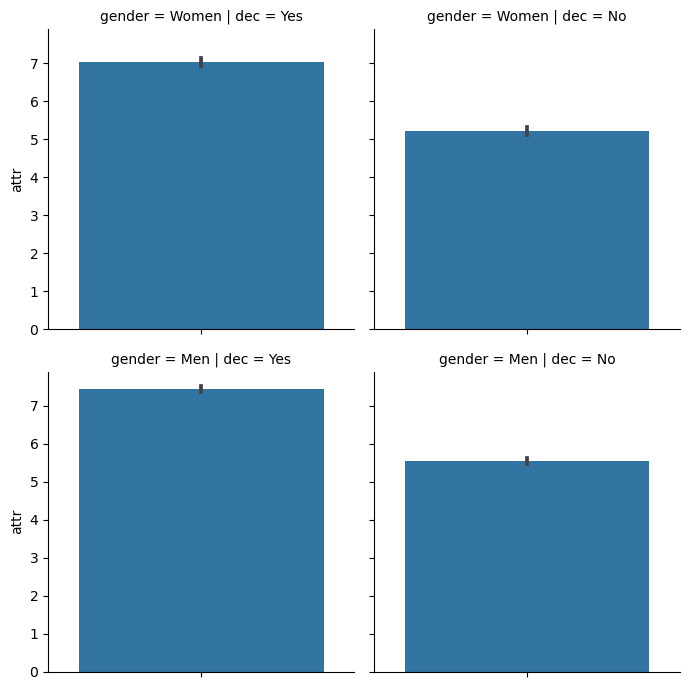

In [29]:
# Ploting both decision for both gender

sns.catplot(kind='bar', data=attr_effect, col='dec', y='attr', row='gender', legend= True, estimator=np.mean, height=3.5);

In [30]:
# Verifying if women were seen as more attractive then men after each dates.

fig = px.bar(attr_gender, y="attr")
fig.show()

**As seen before, the more attractive people are, the more they're asked on second dates. It's the same for both sex. For men, both outcomes are a little bit higher than the women's.**

**Note that, wanting a second date doesn't means it is a match. For a match to occure there needs to have both partners to want a second date.**


## Looking at the difference of importance between a shared racial background and shared interets / hobbies

In [31]:
# Defining the columns used

# "samerace" If both persons are of the same race/ethnic background. 1=yes 0=no
# "imprace" Importance of having a partner the same race/ethnic, it's subjective
# "race" The race/ethnicity of each participants
# "shar_" Shared hobbies between partenaires at differents stages of the process

In [32]:
# Creating a new dataframe from columns with the same part in their names.

targets = ['shar1']
targetCols = []
for target in targets:
  targetCols = [col for col in hundred_distrib.columns if target in col]
  df_race = hundred_distrib[targetCols]
  
df_race

,shar1_1,shar1_s,shar1_2,shar1_3
0,15.0,NaN,16.67,15.0
1,15.0,NaN,16.67,15.0
2,15.0,NaN,16.67,15.0
3,15.0,NaN,16.67,15.0
4,15.0,NaN,16.67,15.0
...,...,...,...,...
6811,0.0,NaN,5.00,0.0
6812,0.0,NaN,5.00,0.0
6813,0.0,NaN,5.00,0.0
6814,0.0,NaN,5.00,0.0


In [33]:
# Creating a second dataframe with columns with a definite name. I can't do it in the last cell because some definite names are included in some partial.

targets = ["shar", "samerace", "imprace", "race", 'gender', "dec"]
to_join = hundred_distrib[targets]

# Joining the two dataframes
df_race = df_race.join(to_join, how='inner')
df_race.head()

,shar1_1,shar1_s,shar1_2,shar1_3,shar,samerace,imprace,race,gender,dec
0,15.0,NaN,16.67,15.0,5.0,0,2.0,4.0,0,1
1,15.0,NaN,16.67,15.0,6.0,0,2.0,4.0,0,1
2,15.0,NaN,16.67,15.0,7.0,1,2.0,4.0,0,1
3,15.0,NaN,16.67,15.0,8.0,0,2.0,4.0,0,1
4,15.0,NaN,16.67,15.0,6.0,0,2.0,4.0,0,1


In [34]:
# Making the focus on the mean per gender

shared = df_race.groupby(["gender"]).agg("mean")
shared

,shar1_1,shar1_s,shar1_2,shar1_3,shar,samerace,imprace,race,dec
gender,,,,,,,,,
0,12.356729,12.635849,13.673474,13.396603,5.270153,0.388373,3.926744,2.842454,0.377365
1,10.264797,10.337110,10.832702,9.754717,5.539448,0.384108,3.532145,2.744235,0.454892


In [35]:
shared = shared.rename(index={0: "women", 1: "men"})
shared

,shar1_1,shar1_s,shar1_2,shar1_3,shar,samerace,imprace,race,dec
gender,,,,,,,,,
women,12.356729,12.635849,13.673474,13.396603,5.270153,0.388373,3.926744,2.842454,0.377365
men,10.264797,10.337110,10.832702,9.754717,5.539448,0.384108,3.532145,2.744235,0.454892


In [36]:
# Ploting the importance of having a partner the same racial/ethnic background per gender

fig = px.bar(shared, y="imprace", title="Importance of having a partner the same racial/ethnic background than you.")
fig.update_yaxes(title_text="Importance of the race /10")

fig.show()

**Being of the same race/ethnicities is more important for women than men.**

In [37]:
# Making the focus on the mean per race/ethnicity

racedf = df_race.groupby(["race"]).agg("mean")
racedf

,shar1_1,shar1_s,shar1_2,shar1_3,shar,samerace,imprace,gender,dec
race,,,,,,,,,
1.0,9.718310,11.370690,10.708502,12.058824,5.804781,0.056338,3.376761,0.538732,0.542254
2.0,10.638631,11.201005,11.951985,10.850708,5.374232,0.567305,4.148218,0.524945,0.370882
3.0,10.425163,7.818750,12.160888,13.009302,5.081841,0.078675,2.571429,0.358178,0.393375
4.0,13.727737,13.678707,12.654967,13.394628,5.409667,0.247101,3.455797,0.486232,0.478986
6.0,10.450882,9.772358,14.212064,13.577778,5.674157,0.083123,2.992443,0.483627,0.508816


In [38]:
# Renaming the rows for better understanding

racedf = racedf.rename(index={1.0: "Black", 2.0: "Caucasian", 3.0:"Latino", 4.0:"Asian", 5.0:"Native", 6.0:"Other"})
racedf

,shar1_1,shar1_s,shar1_2,shar1_3,shar,samerace,imprace,gender,dec
race,,,,,,,,,
Black,9.718310,11.370690,10.708502,12.058824,5.804781,0.056338,3.376761,0.538732,0.542254
Caucasian,10.638631,11.201005,11.951985,10.850708,5.374232,0.567305,4.148218,0.524945,0.370882
Latino,10.425163,7.818750,12.160888,13.009302,5.081841,0.078675,2.571429,0.358178,0.393375
Asian,13.727737,13.678707,12.654967,13.394628,5.409667,0.247101,3.455797,0.486232,0.478986
Other,10.450882,9.772358,14.212064,13.577778,5.674157,0.083123,2.992443,0.483627,0.508816


In [39]:
# Ploting the importance to have a partner the same race/ethnic background than you for each race/ethnicity

fig = px.bar(racedf, y="imprace", title="Importance of having a partner the same racial/ethnic background than you.")
fig.update_yaxes(title_text="Importance of the race /10")

fig.show()

**Being of the same race/ethnicities is more important for caucasian and not really for latinos**

In [40]:
# Making the focus on the mean per decision on asking for a second date or not

racedec = df_race.groupby(["dec"]).agg("mean")
racedec

,shar1_1,shar1_s,shar1_2,shar1_3,shar,samerace,imprace,race,gender
dec,,,,,,,,,
0,10.930164,11.176373,11.843753,11.619536,4.626807,0.383910,3.952538,2.712448,0.464655
1,11.828603,11.894220,12.755229,11.949153,6.445212,0.389535,3.417435,2.906656,0.544435


In [41]:
# Renaming the rows for better understanding

racedec = racedec.rename(index={0: "No", 1: "Yes"})
racedec

,shar1_1,shar1_s,shar1_2,shar1_3,shar,samerace,imprace,race,gender
dec,,,,,,,,,
No,10.930164,11.176373,11.843753,11.619536,4.626807,0.383910,3.952538,2.712448,0.464655
Yes,11.828603,11.894220,12.755229,11.949153,6.445212,0.389535,3.417435,2.906656,0.544435


In [42]:
# Comparing the mean rate for shared hobbies for the decision for a second date or not

fig = px.bar(racedec, y="shar", title="Rating of shared hobbies after each date and if it was a proposal for a second date.")
fig.update_yaxes(title_text="Shared hobbies /10")
fig.update_xaxes(title_text="Demand for a second dates")

fig.show()

**Their is a higher chance to have a second date if people have shared hobbies**

In [43]:
# Comparing the pourcentage of dates with partners being the same race/ethnic background to the demands for a second date 

fig = px.bar(racedec, y="samerace", title="Percentage of second dates asked to someone the same race.")
fig.update_yaxes(title_text="Same race")
fig.update_xaxes(title_text="Demand for a second dates")

fig.show()

**The chance to have a second date with someone the same race/ethnicities is coherent with the number of people that said it was important to them.**
**Having a hobbies in commun seems to be more impactfull then being of the same racila/ehtnic background.**

## Looking at how accuartely people percieved themselves on the dating market

In [44]:
#"*1_1" Rating their attributes before the event.
#"*_o" Rating by partner the night of the event.
#"dec_o" Decision for a second date by the partner the night of event.
#"*5_*" How do people think others perceive their attributes.
#"match_es" Estimation (by the candidate) of the numbers of demand for second dates, he/she will receive.

In [45]:
# Creating a new dataframe from columns with the same part in their names.

own_percep = pd.DataFrame()
targets = ["5_1", "1_1"]
targetCols = []
for target in targets:
  targetCols.extend([col for col in df.columns if target in col])
  own_percep = hundred_distrib[targetCols]

own_percep

,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0
1,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0
2,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0
3,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0
4,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
6811,9.0,7.0,10.0,5.0,9.0,70.0,0.0,15.0,15.0,0.0,0.0
6812,9.0,7.0,10.0,5.0,9.0,70.0,0.0,15.0,15.0,0.0,0.0
6813,9.0,7.0,10.0,5.0,9.0,70.0,0.0,15.0,15.0,0.0,0.0
6814,9.0,7.0,10.0,5.0,9.0,70.0,0.0,15.0,15.0,0.0,0.0


In [46]:
# Creating a second dataframe with columns with a definite name. I can't do it in the last cell because some definite names are included in some partial.
# I wrote mulitple names ending with "_o" here and not in the previous cell since their is others columns with that ending that I don't need here

targets = ["attr_o", "sinc_o", "amb_o", "dec_o", "fun_o", "intel_o", "shar_o", "match_es", "gender"]
to_join = hundred_distrib[targets]

# Joining the two dataframes
own_percep = own_percep.join(to_join, how='inner')
own_percep

,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr_o,sinc_o,amb_o,dec_o,fun_o,intel_o,shar_o,match_es,gender
0,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,0,8.0,8.0,6.0,4.0,0
1,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,0,7.0,10.0,5.0,4.0,0
2,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,10.0,10.0,10.0,1,10.0,10.0,10.0,4.0,0
3,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,9.0,1,8.0,9.0,8.0,4.0,0
4,NaN,NaN,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,8.0,7.0,9.0,1,6.0,9.0,7.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,9.0,7.0,10.0,5.0,9.0,70.0,0.0,15.0,15.0,0.0,0.0,10.0,5.0,6.0,1,2.0,3.0,5.0,3.0,1
6812,9.0,7.0,10.0,5.0,9.0,70.0,0.0,15.0,15.0,0.0,0.0,6.0,3.0,7.0,0,3.0,7.0,2.0,3.0,1
6813,9.0,7.0,10.0,5.0,9.0,70.0,0.0,15.0,15.0,0.0,0.0,2.0,1.0,2.0,0,2.0,2.0,1.0,3.0,1
6814,9.0,7.0,10.0,5.0,9.0,70.0,0.0,15.0,15.0,0.0,0.0,5.0,7.0,3.0,1,5.0,5.0,6.0,3.0,1


In [47]:
# Making the focus on the mean per gender

yourself = own_percep.groupby(['gender']).agg('mean')
yourself

,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr_o,sinc_o,amb_o,dec_o,fun_o,intel_o,shar_o,match_es
gender,,,,,,,,,,,,,,,,,,,
0,7.011381,8.107373,8.304305,7.388422,7.796635,18.495934,18.541465,21.789239,16.889520,11.945251,12.356729,6.436402,7.251345,6.618949,0.454076,6.508468,7.305764,5.511951,2.925737
1,6.794962,7.790428,8.395970,7.313854,7.468010,29.228267,16.349790,19.566771,17.373457,7.188324,10.264797,5.859526,7.040599,6.883100,0.375434,6.223049,7.381298,5.293802,3.303935


In [48]:
# Renaming the rows ofr better understanding

yourself = yourself.rename(index={0: "women", 1: "men"})
yourself

,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr_o,sinc_o,amb_o,dec_o,fun_o,intel_o,shar_o,match_es
gender,,,,,,,,,,,,,,,,,,,
women,7.011381,8.107373,8.304305,7.388422,7.796635,18.495934,18.541465,21.789239,16.889520,11.945251,12.356729,6.436402,7.251345,6.618949,0.454076,6.508468,7.305764,5.511951,2.925737
men,6.794962,7.790428,8.395970,7.313854,7.468010,29.228267,16.349790,19.566771,17.373457,7.188324,10.264797,5.859526,7.040599,6.883100,0.375434,6.223049,7.381298,5.293802,3.303935


In [49]:
# Ploting the difference between each attributes for different points of views
# Making a dropdown menu with subplot in it
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ("How do you see yourself ?", "How do you think others see you ?", "What others rated you"))

# Ploting all the Attractivness attributes values needed
fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['attr1_1'],
        name = "Attractivness"),
        row=1,
        col=1)

fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['attr5_1'],
        name = "Attractivness"),
        row=1,
        col=2)

fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['attr_o'],
        name = "Attractivness"),
        row=1,
        col=3)

# Ploting all the Sincerity attributes values needed
fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['sinc1_1'],
        name = "Sincerity"),
        row=1,
        col=1)

fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['sinc5_1'],
        name = "Sincerity"),
        row=1,
        col=2)

fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['sinc_o'],
        name = "Sincerity"),
        row=1,
        col=3)

# Ploting all the Intelligence attributes values needed
fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['intel1_1'],
        name = "Intelligence"),
        row=1,
        col=1)

fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['intel5_1'],
        name = "Intelligence"),
        row=1,
        col=2)

fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['intel_o'],
        name = "Intelligence"),
        row=1,
        col=3)

# Ploting all the Fun attributes values needed        
fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['fun1_1'],
        name = "Funny"),
        row=1,
        col=1)

fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['fun5_1'],
        name = "Funny"),
        row=1,
        col=2)

fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['fun_o'],
        name = "Funny"),
        row=1,
        col=3)
        
# Ploting all the Ambition attributes values needed
fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['amb1_1'],
        name = "Ambition"),
        row=1,
        col=1)

fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['amb5_1'],
        name = "Ambition"),
        row=1,
        col=2)

fig.add_trace(
    go.Bar(
        x= yourself.index,
        y = yourself['amb_o'],
        name = "Ambition"),
        row=1,
        col=3)


fig.update_layout(
        title = go.layout.Title(text = "Ploting the difference between each attributes for different points of views", x = 0.5),
        showlegend = False, 
        barmode='group')

# Setting up the buttons for the dropdown menu
fig.update_layout(
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Global",
                        method = "update",
                        args = [{"visible" : [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]}]),
                    go.layout.updatemenu.Button(
                            label = "Attractivness",
                            method = "update",
                            args = [{"visible" : [True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Sincerity",
                            method = "update",
                            args = [{"visible" : [False, False, False, True, True, True, False, False, False, False, False, False, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Intelligence",
                            method = "update",
                            args = [{"visible" : [False, False, False, False, False, False, True, True, True, False, False, False, False, False, False]}]),
                    go.layout.updatemenu.Button(
                            label = "Funny",
                            method = "update",
                            args = [{"visible" : [False, False, False, False, False, False, False, False, False, True, True, True, False, False, False]}]),
                     go.layout.updatemenu.Button(
                            label = "Ambition",
                            method = "update",
                            args = [{"visible" : [False, False, False, False, False, False, False, False, False, False, False, False, True, True, True]}]),                                                       
                ]
    )]
)

**There is a problem, even people who had to a 100pt distribution sometimes rated out of 10. Since the waves from the out of ten rating are unusable, I will only use the two graphs on the left.**

**People (of all gender) overestimate how they are seen by others. Almost all the attributes drop around 1pt so the the rating that people did about themselves isn't completly inaccurate.**